## Mushroom Classification-Safe to eat or deadly poison?
What types of machine learning models perform best on this dataset?
Which features are most indicative of a poisonous mushroom?
Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. 
https://www.kaggle.com/uciml/mushroom-classification

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score

### Import Dataset

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
x_en1=df.iloc[:,[0]].values
df['class']=labelencoder.fit_transform(x_en1)
x_en2=df.iloc[:,[6]].values
df['gill-attachment']=labelencoder.fit_transform(x_en2)
x_en3=df.iloc[:,[7]].values
df['gill-spacing']=labelencoder.fit_transform(x_en3)
x_en4=df.iloc[:,[8]].values
df['gill-size']=labelencoder.fit_transform(x_en4)
x_en5=df.iloc[:,[10]].values
df['stalk-shape']=labelencoder.fit_transform(x_en5)
x_en6=df.iloc[:,[4]].values
df['bruises']=labelencoder.fit_transform(x_en6)
x_en7=df.iloc[:,[16]].values
df['veil-type']=labelencoder.fit_transform(x_en7)
df.head()

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,1,p,1,0,1,k,...,s,w,w,0,w,o,p,k,s,u
1,0,x,s,y,1,a,1,0,0,k,...,s,w,w,0,w,o,p,n,n,g
2,0,b,s,w,1,l,1,0,0,n,...,s,w,w,0,w,o,p,n,n,m
3,1,x,y,w,1,p,1,0,1,n,...,s,w,w,0,w,o,p,k,s,u
4,0,x,s,g,0,n,1,1,0,k,...,s,w,w,0,w,o,e,n,a,g


In [9]:
# columns - No.of categories
#class-2, cap-shape'-2, car-shape-6, cap-surface-4, cap-color-10, bruises-2, odor-9, gill-attachment-2, gill-spacing-2, gill-size-2, 
#gill-color-12, stalk-shape-2, stalk-root-5, stalk-surface-above-ring-4,stalk-surface-below-ring-4, stalk-color-above-ring-9,
#stalk-color-below-ring-9, veil-type- 2, veil-color-4, ring-number-3, ring-type-5, spore-print-color-9, population-6, habitat-7
for col in df.columns:
    print(df.groupby([col]).size())

class
0    4208
1    3916
dtype: int64
cap-shape
b     452
c       4
f    3152
k     828
s      32
x    3656
dtype: int64
cap-surface
f    2320
g       4
s    2556
y    3244
dtype: int64
cap-color
b     168
c      44
e    1500
g    1840
n    2284
p     144
r      16
u      16
w    1040
y    1072
dtype: int64
bruises
0    4748
1    3376
dtype: int64
odor
a     400
c     192
f    2160
l     400
m      36
n    3528
p     256
s     576
y     576
dtype: int64
gill-attachment
0     210
1    7914
dtype: int64
gill-spacing
0    6812
1    1312
dtype: int64
gill-size
0    5612
1    2512
dtype: int64
gill-color
b    1728
e      96
g     752
h     732
k     408
n    1048
o      64
p    1492
r      24
u     492
w    1202
y      86
dtype: int64
stalk-shape
0    3516
1    4608
dtype: int64
stalk-root
?    2480
b    3776
c     556
e    1120
r     192
dtype: int64
stalk-surface-above-ring
f     552
k    2372
s    5176
y      24
dtype: int64
stalk-surface-below-ring
f     600
k    2304
s    4936
y     2

In [10]:
df['stalk-root'].replace('?','a', inplace=True)
df['stalk-root'].value_counts()

b    3776
a    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [11]:
shape = pd.get_dummies(df['cap-shape'],drop_first=True,prefix='shape')
suface = pd.get_dummies(df['cap-surface'],drop_first=True,prefix='surface')
colors = pd.get_dummies(df['cap-color'],drop_first=True,prefix='colors')
odor = pd.get_dummies(df['odor'],drop_first=True,prefix='odor')
gilcolor = pd.get_dummies(df['gill-color'],drop_first=True,prefix='gilcolor')
stalk_root = pd.get_dummies(df['stalk-root'],drop_first=True,prefix='sroot')
ssa_ring = pd.get_dummies(df['stalk-surface-above-ring'],drop_first=True,prefix='ssa_ring')
ssb_ring = pd.get_dummies(df['stalk-surface-below-ring'],drop_first=True,prefix='ssb_ring')
sca_ring = pd.get_dummies(df['stalk-color-above-ring'],drop_first=True,prefix='sca_ring')
scb_ring = pd.get_dummies(df['stalk-color-below-ring'],drop_first=True,prefix='scb_ring')
veil_color = pd.get_dummies(df['veil-color'],drop_first=True,prefix='veil-color')
ringno = pd.get_dummies(df['ring-number'],drop_first=True,prefix='ring-number')
ringtype = pd.get_dummies(df['ring-type'],drop_first=True,prefix='ring-type')
sp_color = pd.get_dummies(df['spore-print-color'],drop_first=True,prefix='sp-color')
population = pd.get_dummies(df['population'],drop_first=True,prefix='pop')
habitat = pd.get_dummies(df['habitat'],drop_first=True,prefix='habit')
habitat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   habit_g  8124 non-null   uint8
 1   habit_l  8124 non-null   uint8
 2   habit_m  8124 non-null   uint8
 3   habit_p  8124 non-null   uint8
 4   habit_u  8124 non-null   uint8
 5   habit_w  8124 non-null   uint8
dtypes: uint8(6)
memory usage: 47.7 KB


In [12]:
col = ['shape','suface','colors','odor','gilcolor','stalk_root','ssa_ring','ssb_ring','sca_ring','scb_ring','veil_color','ringno','ringtype','sp_color','population','habitat']
df_new = pd.concat([shape,suface,colors,odor,gilcolor,stalk_root,ssa_ring,ssb_ring,sca_ring,scb_ring,veil_color,ringno,ringtype,sp_color,population,habitat],axis=1)
df_new.head()

,shape_c,shape_f,shape_k,shape_s,shape_x,surface_g,surface_s,surface_y,colors_c,colors_e,...,pop_n,pop_s,pop_v,pop_y,habit_g,habit_l,habit_m,habit_p,habit_u,habit_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
df_new.isnull().sum()

shape_c    0
shape_f    0
shape_k    0
shape_s    0
shape_x    0
          ..
habit_l    0
habit_m    0
habit_p    0
habit_u    0
habit_w    0
Length: 90, dtype: int64

### Feature Engineering

In [14]:
x = df_new.copy()
y = df['class']
x.shape,y.shape

((8124, 90), (8124,))

In [15]:
#class-2, cap-shape'-2, car-shape-6, cap-surface-4, cap-color-10, bruises-2, odor-9, gill-attachment-2, gill-spacing-2, gill-size-2, 
#gill-color-12, stalk-shape-2, stalk-root-5, stalk-surface-above-ring-4,stalk-surface-below-ring-4, stalk-color-above-ring-9,
#stalk-color-below-ring-9, veil-type- 2, veil-color-4, ring-number-3, ring-type-5, spore-print-color-9, population-6, habitat-7

In [16]:
# check multicollinarity by pearson coefficient correlation , for independent(x) variable only

In [17]:
def correlation(dataset,threshold):
    col_corr = list()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname = corr_matrix.columns[i]
                col_corr.append(colname)
    return col_corr

In [18]:
x_new1 = correlation(x,0.6)
x_new = pd.DataFrame(data=x,columns=x_new1)
x_new.head()

,ssb_ring_k,ssb_ring_k,ssb_ring_y,sca_ring_c,scb_ring_c,scb_ring_c,scb_ring_o,veil-color_o,veil-color_o,veil-color_y,...,ring-type_n,ring-type_n,ring-type_n,sp-color_h,sp-color_h,habit_m,habit_w,habit_w,habit_w,habit_w
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Feature selection - 1.Mutual info classifier(x_new,y)

<AxesSubplot:>

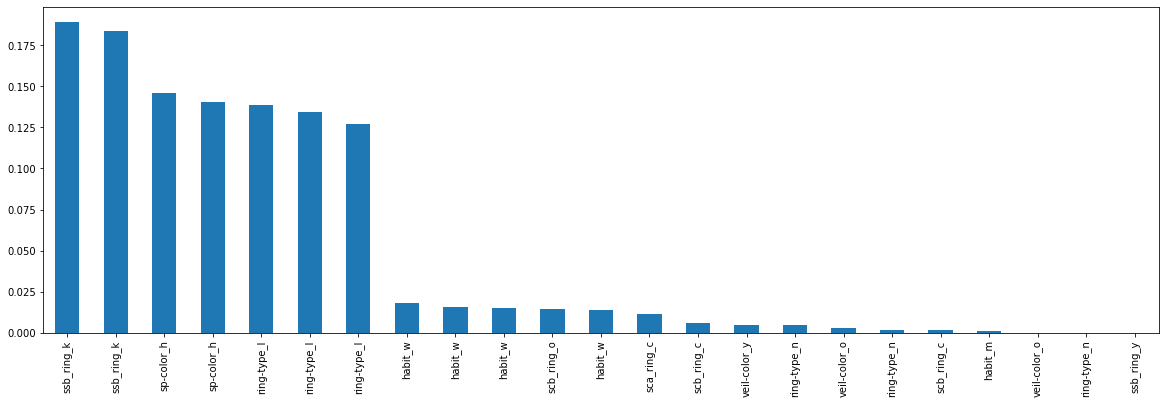

In [20]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(x_new,y)
mi_info = pd.Series(mi)
mi_info.index = x_new.columns
mi_info.sort_values(ascending=False).plot.bar(figsize=(20,6))

In [21]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(mutual_info_classif,k=20)
selector.fit(x_new,y)

cols = selector.get_support(indices=True)
x_kbest = x_new.iloc[:,cols]
x_kbest.shape

(8124, 20)

In [22]:
# Feature selection - 2.PCA (x_new)

In [23]:
from sklearn import decomposition
pca = decomposition.PCA(n_components =20)
score = pca.fit_transform(x_new)
pca.explained_variance_ratio_

array([6.70680786e-01, 1.28821632e-01, 6.71851135e-02, 3.17879746e-02,
       3.02747039e-02, 2.83271453e-02, 2.33357815e-02, 1.38484714e-02,
       5.04072714e-03, 6.97664472e-04, 2.96650154e-29, 6.62738386e-31,
       7.96214606e-32, 1.22817062e-32, 3.06084209e-33, 1.30203353e-33,
       4.91133547e-34, 1.64446039e-35, 2.26407514e-36, 3.61715326e-38])

In [24]:
x_pca = pd.DataFrame(data =score, columns = ['pca1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20'])
x_pca.shape

(8124, 20)

### Feature selected by mutual info classifier (SelectKBest method)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_kbest,y,test_size=0.3,random_state=100)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5686, 20), (2438, 20), (5686,), (2438,))

In [26]:
# logistic Regression Algorithm

In [27]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(x_train,y_train)   
LRmodel.score(x_train,y_train)

0.800211044671122

In [28]:
y_pred1 = LRmodel.predict(x_train)
y_pred2 = LRmodel.predict(x_test)
accuracy_score(y_test,y_pred2)

0.8031173092698933

In [29]:
# Decision Tree Algorithm

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtmodel= DecisionTreeClassifier(random_state=100)
dtmodel.fit(x_train,y_train)
dtmodel.score(x_train,y_train)

0.800211044671122

In [31]:
y_pred3 = dtmodel.predict(x_train)
y_pred4 = dtmodel.predict(x_test)
accuracy_score(y_test,y_pred4)

0.8031173092698933

In [32]:
# KNeighborsClassifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_train,y_train)
knnmodel.score(x_train,y_train)

0.7108688005627858

In [34]:
y_pred5 = knnmodel.predict(x_train)
y_pred6 = knnmodel.predict(x_test)
accuracy_score(y_test,y_pred6)

0.716160787530763

In [35]:
# AdaBoost Algorithm

In [36]:
from sklearn.ensemble import AdaBoostClassifier
adamodel = AdaBoostClassifier(random_state=100)
adamodel.fit(x_train,y_train)
adamodel.score(x_train,y_train)

0.800211044671122

In [37]:
y_pred7 = adamodel.predict(x_train)
y_pred8 = adamodel.predict(x_test)
accuracy_score(y_test,y_pred8)

0.8031173092698933

In [38]:
# SVM algorithm

In [39]:
from sklearn.svm import SVC
svmmodel = SVC(random_state=100)
svmmodel.fit(x_train,y_train)
svmmodel.score(x_train,y_train)

0.800211044671122

In [40]:
y_pred9 = svmmodel.predict(x_train)
y_pred10= svmmodel.predict(x_test)
accuracy_score(y_test,y_pred10)

0.8031173092698933

### Feature selected by PCA

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.3,random_state=100)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5686, 20), (2438, 20), (5686,), (2438,))

In [42]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(x_train,y_train)   
LRmodel.score(x_train,y_train)

0.800211044671122

In [43]:
y_pred = LRmodel.predict(x_test)
accuracy_score(y_test,y_pred)

0.8031173092698933

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_train,y_train)
knnmodel.score(x_train,y_train)

0.48804080196975025

In [45]:
y_pred = knnmodel.predict(x_test)
accuracy_score(y_test,y_pred)

0.49056603773584906

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtmodel= DecisionTreeClassifier(random_state=100)
dtmodel.fit(x_train,y_train)
dtmodel.score(x_train,y_train)

0.800211044671122

In [47]:
y_pred = dtmodel.predict(x_test)
accuracy_score(y_test,y_pred)

0.8031173092698933

In [48]:
from sklearn.svm import SVC
svmmodel = SVC(random_state=100)
svmmodel.fit(x_train,y_train)
svmmodel.score(x_train,y_train)

0.800211044671122

In [49]:
y_pred = svmmodel.predict(x_test)
accuracy_score(y_test,y_pred)

0.8031173092698933

### Conclusion-

+ Logistic Regression/ Decision Tree/ svm / AdaBoost algorithm gives accuracy near about 80 percent,
+ Accuracy in training the model and testing the model is nearly same, means model is balance fit(low variance,low bias)
+ Feature selected by 2 ways, but accuracy for both are same,means extracted features are nearby same
+ Low accuracy in clustering, feature selected by mutual info classifier given better accuracy than PCA 

In [69]:
train_prediction={'LR':y_pred1,'DT':y_pred3,'KNN':y_pred5,'SVM':y_pred9}
train_prediction = pd.DataFrame(train_prediction)
train_prediction.shape, y_train.shape

((5686, 4), (5686,))

In [70]:
test_prediction={'LR':y_pred2,'DT':y_pred4,'KNN':y_pred6,'SVM':y_pred10}
test_prediction = pd.DataFrame(test_prediction)
test_prediction.head()

,LR,DT,KNN,SVM
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [72]:
# stacker model
smodel = AdaBoostClassifier(random_state=100)
smodel.fit(train_prediction,y_train)
smodel.score(train_prediction,y_train)

0.800211044671122

In [73]:
smodel.score(test_prediction,y_test)

0.8031173092698933